# Lecture 02 - Demo Notebook

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import skewnorm, chi2_contingency
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder 

DATA_DIR = "./data"

In [2]:
df = pd.read_csv('{}/aggregated_fc.csv'.format(DATA_DIR))
df.head()

,user,grade,gender,category,year,sessions,time_in_problem,time_in_video,lecture_delay,content_anticipation,mean_playback_speed,relative_video_pause,submissions,submissions_correct,clicks_weekend,clicks_weekday
0,0,4.50,NaN,NaN,Y2-2018-19,19.0,23344.0,29518.0,55068.387500,0.006061,0.968519,0.137436,30.0,20.0,168.0,381.0
1,1,4.50,M,Suisse.Autres,Y2-2018-19,34.0,16984.0,92278.0,-2883.367738,0.009091,1.122014,0.361389,90.0,59.0,40.0,1794.0
2,2,5.25,M,Suisse.PAM,Y2-2018-19,53.0,23406.0,108013.0,10027.216667,0.237488,0.807090,0.272210,61.0,30.0,946.0,1292.0
3,3,4.50,F,Suisse.Autres,Y2-2018-19,28.0,27371.0,81855.0,27596.864484,0.011879,0.500000,0.151223,46.0,32.0,135.0,464.0
4,4,4.75,F,France,Y2-2018-19,25.0,37873.0,70400.0,-914.633333,0.290421,0.846794,0.196403,3.0,1.0,584.0,649.0


In [3]:
display(df)

,user,grade,gender,category,year,sessions,time_in_problem,time_in_video,lecture_delay,content_anticipation,mean_playback_speed,relative_video_pause,submissions,submissions_correct,clicks_weekend,clicks_weekday
0,0,4.50,NaN,NaN,Y2-2018-19,19.0,23344.0,29518.0,55068.387500,0.006061,0.968519,0.137436,30.0,20.0,168.0,381.0
1,1,4.50,M,Suisse.Autres,Y2-2018-19,34.0,16984.0,92278.0,-2883.367738,0.009091,1.122014,0.361389,90.0,59.0,40.0,1794.0
2,2,5.25,M,Suisse.PAM,Y2-2018-19,53.0,23406.0,108013.0,10027.216667,0.237488,0.807090,0.272210,61.0,30.0,946.0,1292.0
3,3,4.50,F,Suisse.Autres,Y2-2018-19,28.0,27371.0,81855.0,27596.864484,0.011879,0.500000,0.151223,46.0,32.0,135.0,464.0
4,4,4.75,F,France,Y2-2018-19,25.0,37873.0,70400.0,-914.633333,0.290421,0.846794,0.196403,3.0,1.0,584.0,649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,293,5.25,M,France,Y3-2019-20,35.0,81275.0,1134.0,0.000000,0.010000,0.246698,0.065734,50.0,34.0,289.0,206.0
284,294,5.25,F,France,Y3-2019-20,22.0,24524.0,46231.0,16834.900000,0.086765,0.800216,0.191907,33.0,14.0,364.0,713.0
285,296,6.00,F,France,Y3-2019-20,9.0,16432.0,19324.0,-12860.522222,0.121485,0.359663,0.028497,12.0,9.0,4.0,312.0
286,297,5.00,M,Suisse.PAM,Y3-2019-20,14.0,27186.0,3603.0,0.000000,0.000000,0.100000,0.029412,7.0,6.0,20.0,153.0


In [4]:
df.columns

Index(['user', 'grade', 'gender', 'category', 'year', 'sessions',
       'time_in_problem', 'time_in_video', 'lecture_delay',
       'content_anticipation', 'mean_playback_speed', 'relative_video_pause',
       'submissions', 'submissions_correct', 'clicks_weekend',
       'clicks_weekday'],
      dtype='object')

## Descriptive Statistics

In [30]:
from scipy import stats
pd.set_option('display.precision', 2)
feature_list = [df['grade'], df['sessions'], df['time_in_problem'],
       df['time_in_video'], df['lecture_delay'], df['content_anticipation'],
       df['mean_playback_speed'], df['relative_video_pause'], df['submissions'],
       df['submissions_correct'], df['clicks_weekend'], df['clicks_weekday']]

data = {'Mean': np.mean(feature_list,1),
        'Median':np.median(feature_list,1),
        'Mode': (stats.mode(feature_list,axis=1, keepdims=True)[0])[:,0],
        'Variance':np.var(feature_list,1),
        'Std':np.std(feature_list,1),
        'Minimum': np.min(feature_list,1),
        '25%': np.percentile(feature_list, 25, axis=1),
        '75%': np.percentile(feature_list, 75, axis=1),
        'Maximum': np.max(feature_list,1)}
desc_stats_df = pd.DataFrame(data, index =['grade', 'sessions', 'time_in_problem',
       'time_in_video', 'lecture_delay', 'content_anticipation',
       'mean_playback_speed', 'relative_video_pause', 'submissions',
       'submissions_correct', 'clicks_weekend', 'clicks_weekday'])

display(desc_stats_df)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
grade,4.05,4.25,5.0,1.49e+00,1.22,1.00,3.25,5.00,6.00
sessions,33.89,34.00,36.0,2.38e+02,15.42,6.00,22.00,43.00,97.00
time_in_problem,28022.04,24209.50,0.0,4.83e+08,21980.95,0.00,10029.00,41756.75,111238.00
time_in_video,82851.62,81735.50,26699.0,2.20e+09,46942.02,0.00,48823.25,111431.25,274917.00
lecture_delay,820.27,0.00,0.0,1.85e+09,43010.20,-159250.48,-22921.90,24249.25,144964.21
content_anticipation,0.11,0.09,0.0,1.02e-02,0.10,0.00,0.01,0.20,0.31
mean_playback_speed,0.94,0.92,0.9,9.37e-02,0.31,0.00,0.80,1.11,1.76
relative_video_pause,0.22,0.23,0.0,1.05e-02,0.10,0.00,0.14,0.30,0.43
submissions,46.05,35.50,0.0,1.77e+03,42.12,0.00,9.75,77.00,171.00
submissions_correct,25.01,18.00,0.0,5.24e+02,22.90,0.00,4.75,41.00,89.00


In [31]:
category = df.category.value_counts(dropna=False)
pd.DataFrame({"Category": category.index, "Count": category.tolist(), "Count %": category.tolist()/np.sum(category.tolist()) })

,Category,Count,Count %
0,France,114,0.40
1,Suisse.Autres,57,0.20
2,Suisse.PAM,57,0.20
3,NaN,49,0.17
4,Etranger.Autres,11,0.04


In [32]:
gender = df.gender.value_counts(dropna=False)
pd.DataFrame({"Gender": gender.index, "Count": gender.tolist(), "Count %": gender.tolist()/np.sum(gender.tolist()) })

,Gender,Count,Count %
0,M,156,0.54
1,F,83,0.29
2,NaN,49,0.17


## Univariate Analysis

[Text(0.5, 0, 'Category'), Text(0, 0.5, 'Count')]

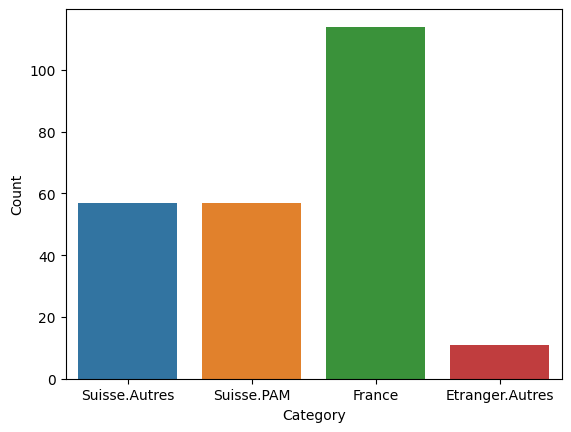

In [33]:
ax = sns.countplot(data=df, x= 'category')
ax.set(xlabel='Category', ylabel='Count')

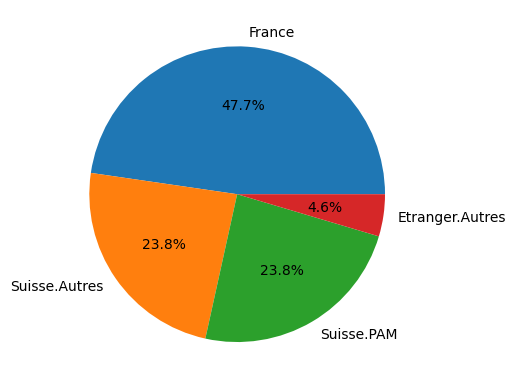

In [34]:
val_counts = df.category.value_counts()/np.sum(df.category.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()


## Does my data follow a normal distribution?

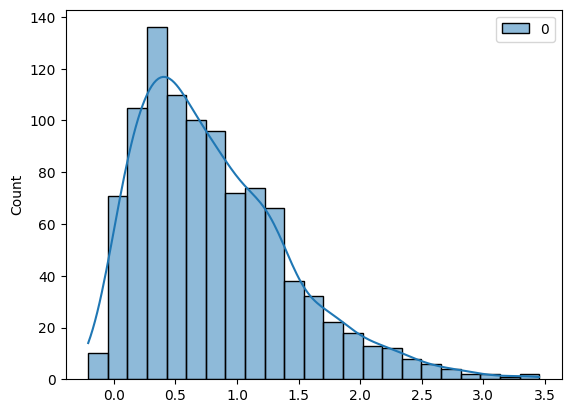

p = 1.67002e-33
The null hypothesis can be rejected


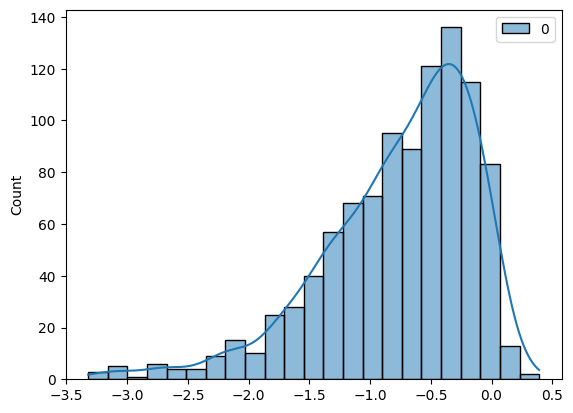

p = 2.27564e-40
The null hypothesis can be rejected


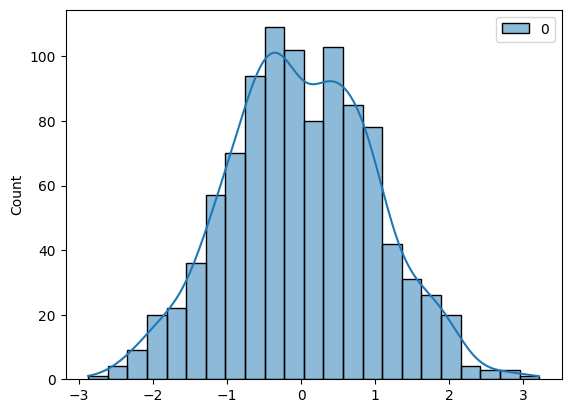

p = 0.312459
The null hypothesis cannot be rejected


In [35]:
def test_normality(data):
    k2, p = stats.normaltest(data)
    alpha = 0.01
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

def visualiza_skewness(a):
    data= skewnorm.rvs(a, size=1000)
    sns.histplot(data=pd.DataFrame(data), kde=True)  
    plt.show()
    test_normality(data)
    
visualiza_skewness(10)
visualiza_skewness(-10)
visualiza_skewness(0)

##  Visual Inspection | Normality

p = 0.0216998
The null hypothesis cannot be rejected


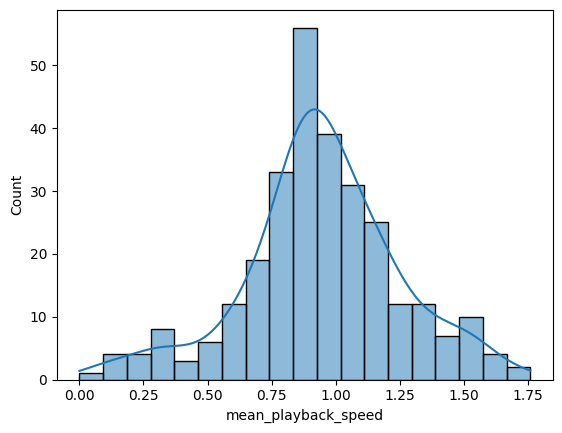

p = 5.78191e-05
The null hypothesis can be rejected


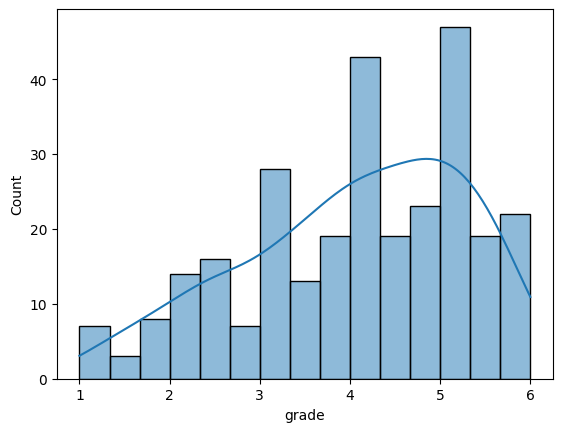

p = 6.20579e-29
The null hypothesis can be rejected


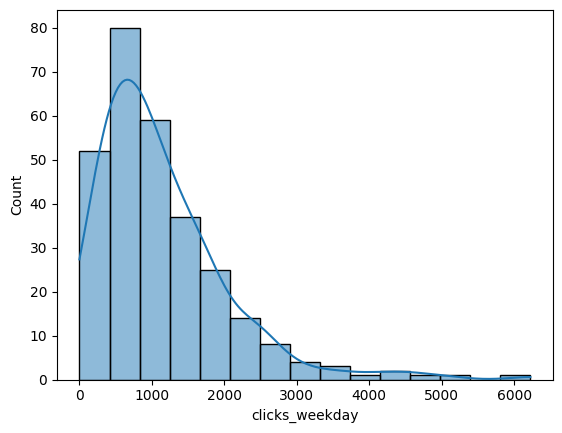

In [36]:
# normally distributed
test_normality(df['mean_playback_speed'])
sns.histplot(data=df, x = 'mean_playback_speed', kde=True) 
plt.show()


# left skewed
test_normality(df['grade'])
sns.histplot(data=df, x = 'grade', kde=True, bins=15) 
plt.show()


# right skewed
test_normality(df['clicks_weekday'])
sns.histplot(data=df, x = 'clicks_weekday', kde=True, bins=15) 
plt.show()


## Multivariate

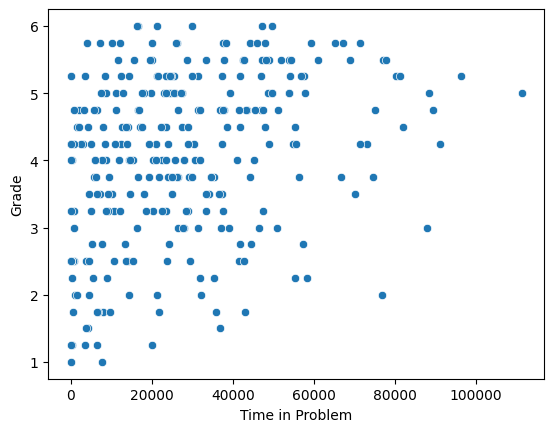

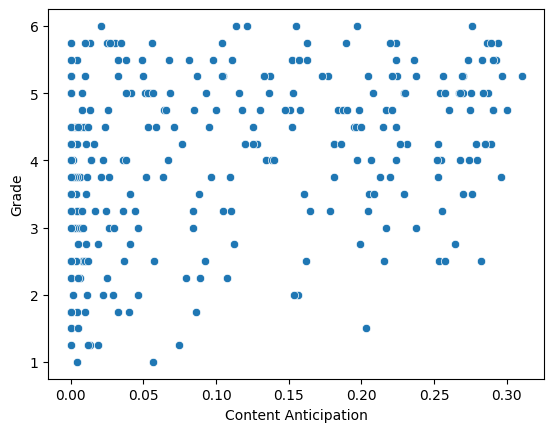

In [37]:
sns.scatterplot(data= df, y = 'grade', x ='time_in_problem')
plt.xlabel("Time in Problem")
plt.ylabel("Grade")
plt.show()

sns.scatterplot(data= df, y = 'grade', x ='content_anticipation')
plt.xlabel("Content Anticipation")
plt.ylabel("Grade")
plt.show()

## Relation between numerical & categorical variable

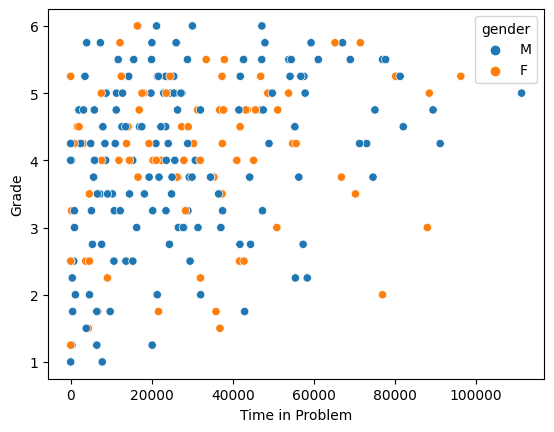

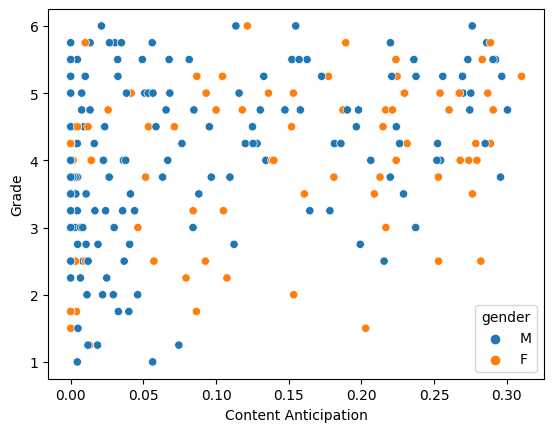

In [38]:
sns.scatterplot(data= df, y = 'grade', x ='time_in_problem', hue='gender')
plt.xlabel("Time in Problem")
plt.ylabel("Grade")
plt.show()

sns.scatterplot(data= df, y = 'grade', x ='content_anticipation', hue='gender')
plt.xlabel("Content Anticipation")
plt.ylabel("Grade")
plt.show()

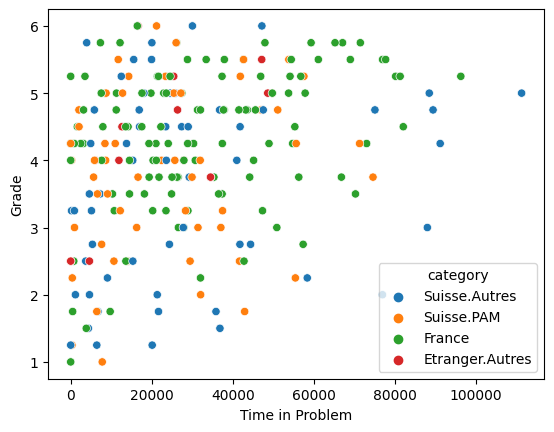

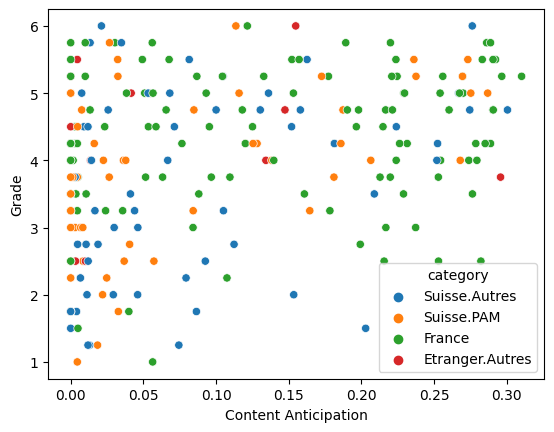

In [39]:
sns.scatterplot(data= df, y = 'grade', x ='time_in_problem', hue='category')
plt.xlabel("Time in Problem")
plt.ylabel("Grade")
plt.show()

sns.scatterplot(data= df, y = 'grade', x ='content_anticipation', hue='category')
plt.xlabel("Content Anticipation")
plt.ylabel("Grade")
plt.show()

## Submissions Correct by Gender

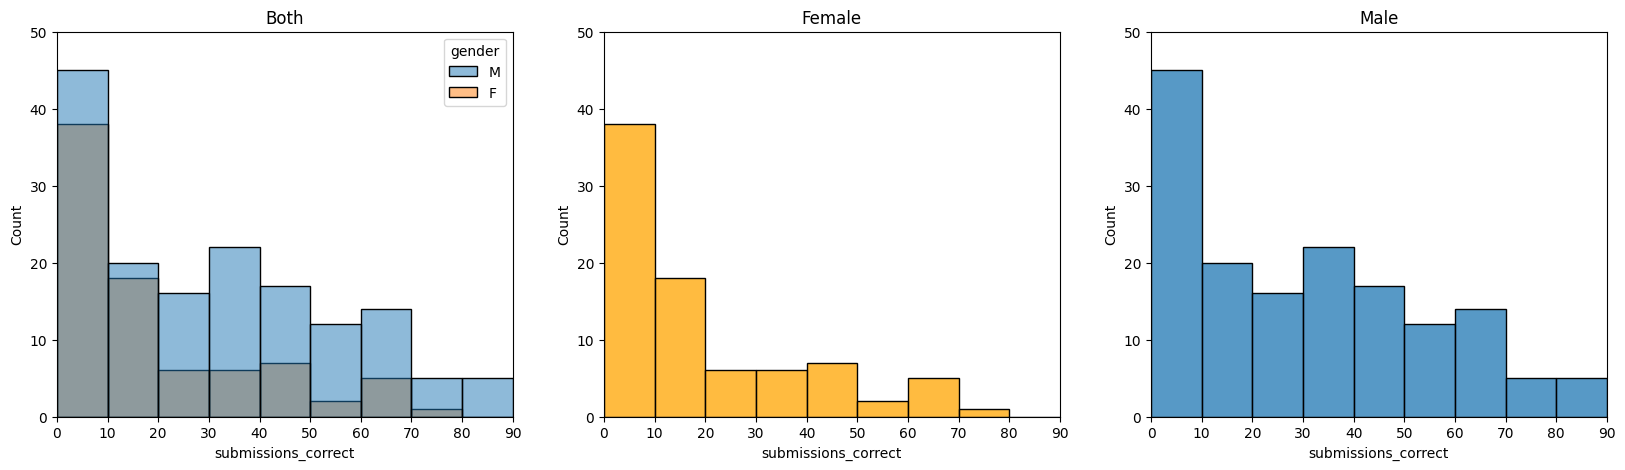

In [40]:
def plot_by_gender(feature, ylim, xlim, bins):
    
    f, axarr = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

    sns.histplot(data= df, x  =feature, hue='gender', ax = axarr[0], bins=bins, binrange = (0,xlim))
    axarr[0].set(title='Both', ylim=(0,ylim),  xlim=(0,xlim))
    
    sns.histplot(data= df[df.gender=='F'], x  = feature,color='orange',  ax = axarr[1], bins=bins, binrange = (0,xlim))
    axarr[1].set(title='Female', ylim=(0, ylim),  xlim=(0,xlim))

    sns.histplot(data= df[df.gender=='M'], x  = feature,  ax = axarr[2], bins=bins, binrange = (0,xlim))
    axarr[2].set(title='Male', ylim=(0,ylim),  xlim=(0,xlim))
    plt.show()
    
plot_by_gender('submissions_correct', ylim = 50, xlim = 90, bins =9)

## Grades by Gender

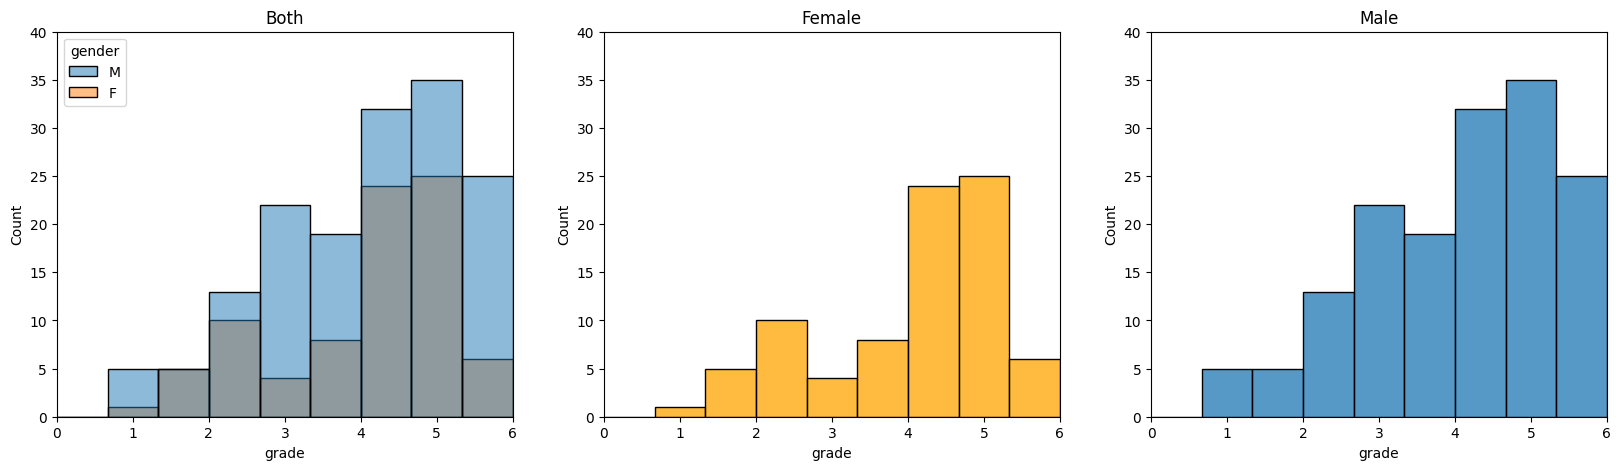

In [41]:
plot_by_gender('grade', 40, 6, bins=9)

In [42]:
# Correlation between variables (pairwise comparisonn)
r, p = stats.pearsonr(df['time_in_problem'], df['grade'])
print(r, p)

r, p = stats.pearsonr(df['content_anticipation'], df['grade'])
print(r, p)

0.3113890545799921 6.806025324406498e-08
0.3255747459138687 1.5493963171434622e-08


## Mutual Information

In [43]:
categorical_x = 'gender'
categorical_y = 'category'

counts_x = df[categorical_x].value_counts()
dx = pd.DataFrame((counts_x/ (counts_x.sum()))).reset_index()
dx.columns = [categorical_x, 'px']
dx

,gender,px
0,M,0.65
1,F,0.35


In [44]:
counts_y = df[categorical_y].value_counts()
dy = pd.DataFrame(counts_y/ (counts_y.sum())).reset_index()
dy.columns = [categorical_y, 'py']
dy

,category,py
0,France,0.48
1,Suisse.Autres,0.24
2,Suisse.PAM,0.24
3,Etranger.Autres,0.05


In [45]:
counts_xy = df[[categorical_x, categorical_y]].value_counts()
d_xy = pd.DataFrame((counts_xy/ (counts_xy.sum()))).reset_index()
d_xy.columns = [categorical_x, categorical_y, 'pxy']
d_xy

,gender,category,pxy
0,M,France,0.28
1,F,France,0.20
2,M,Suisse.PAM,0.20
3,M,Suisse.Autres,0.15
4,F,Suisse.Autres,0.09
5,F,Suisse.PAM,0.04
6,M,Etranger.Autres,0.03
7,F,Etranger.Autres,0.02


<AxesSubplot:xlabel='category', ylabel='count'>

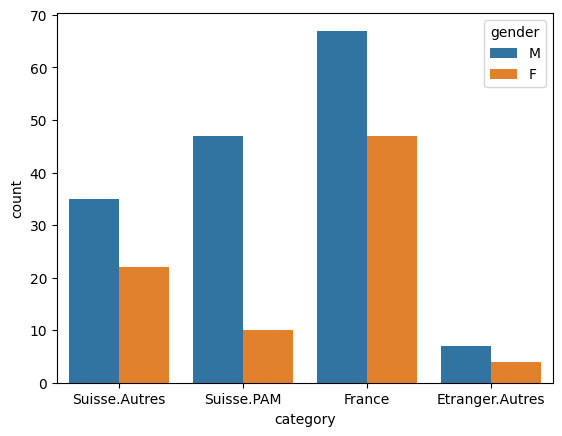

In [46]:
sns.countplot(data = df, x = 'category', hue= 'gender' )

In [47]:

def mutual_information_discrete(df, categorical_x, categorical_y):

    counts_xy = df[[categorical_x, categorical_y]].value_counts()
    d_xy = pd.DataFrame((counts_xy/ (counts_xy.sum()))).reset_index()
    d_xy.columns = [categorical_x, categorical_y, 'pxy']

    counts_x = df[categorical_x].value_counts()
    dx = pd.DataFrame((counts_x/ (counts_x.sum()))).reset_index()
    dx.columns = [categorical_x, 'px']

    counts_y = df[categorical_y].value_counts()
    dy = pd.DataFrame(counts_y/ (counts_y.sum())).reset_index()
    dy.columns = [categorical_y, 'py']

    d_mi = d_xy.merge(dx, on=categorical_x, how='left').merge(dy, on=categorical_y, how='left')

    mi = 0
    for i, row in d_mi.iterrows():
        if row['pxy']>0:
            mi += row['pxy']*np.log(row['pxy']/(row['px']*row['py']))

    return mi


mutual_information_discrete(df, categorical_x, categorical_y)

0.02252285057092981

In [48]:
# Verification
df_mi = df[(~df[categorical_x].isna() & ~df[categorical_y].isna())]
x= LabelEncoder().fit_transform(df_mi[categorical_x]).reshape(-1, 1)
y= LabelEncoder().fit_transform(df_mi[categorical_y]).ravel()

mutual_info_classif(x, y, discrete_features=True)

array([0.02252285])

In [49]:
def mutual_information_continous(x,y,bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi

In [50]:
x = np.array(df['time_in_problem']).reshape(-1,1)
y = np.array(df['grade']).ravel()

mi = mutual_info_regression(x, y, n_neighbors=1)
print(mi)

bins = np.floor(np.sqrt(df.shape[0]/5))
x = np.array(df['time_in_problem'])
mutual_information_continous(x,y,int(bins))


[0.08471592]


0.12198494807828797

## Time series

In [51]:
ts = pd.read_csv('{}/time_series_fc.csv'.format(DATA_DIR))
ts.head()

,week,user,sessions,time_in_problem,time_in_video,lecture_delay,content_anticipation,mean_playback_speed,relative_video_pause,submissions,submissions_correct,clicks_weekend,clicks_weekday
0,0,0,4.0,5682.0,6417.0,-24339.20,0.02,1.54,0.32,8.0,4.0,12.0,102.0
1,0,1,7.0,326.0,15525.0,4492.83,0.09,1.32,0.35,7.0,4.0,40.0,227.0
2,0,2,4.0,1224.0,12209.0,-8998.00,0.06,1.00,0.23,13.0,8.0,1.0,258.0
3,0,3,11.0,3517.0,26500.0,-33102.11,0.05,1.00,0.30,17.0,10.0,10.0,141.0
4,0,4,4.0,1294.0,12037.0,-9146.33,0.18,1.18,0.27,3.0,1.0,140.0,46.0


### H1: The students’ sessions is constant throughout the semester. 

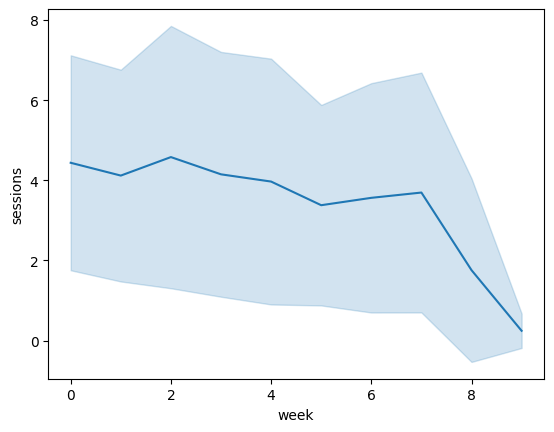

In [52]:
ax = sns.lineplot(data=ts, x="week", y="sessions", errorbar='sd')
plt.show()

### H2: There is no difference between males and females in terms of the sessions.

In [53]:
ts = ts.merge(df[['user','gender']], how='left', on='user')

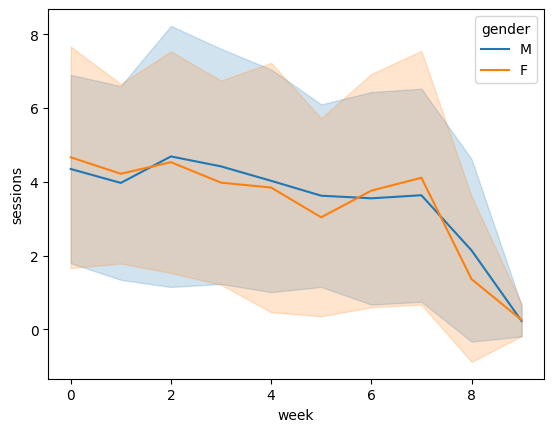

In [54]:
ax = sns.lineplot(data=ts, x="week", y="sessions",  errorbar='sd', hue = 'gender')

### H3: Students study more during the week and there is no difference between males and females

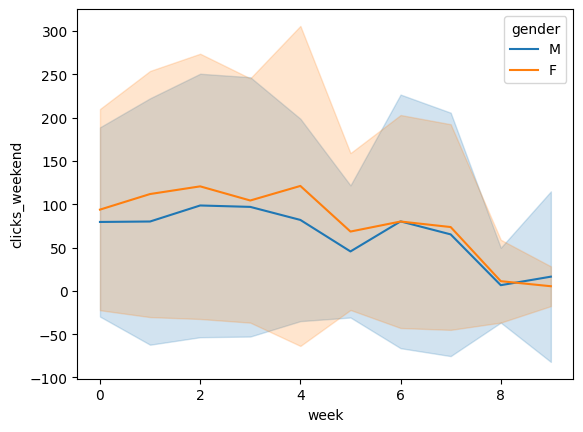

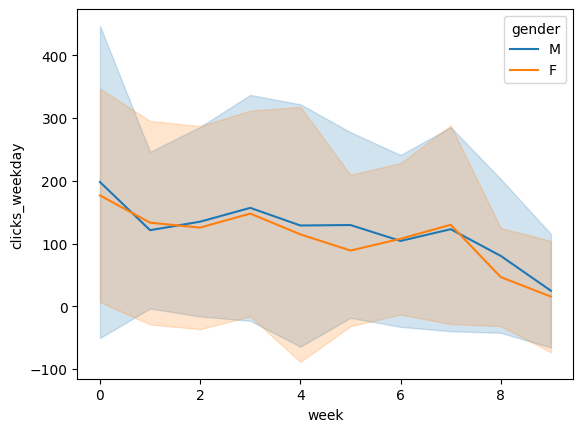

In [55]:
ax = sns.lineplot(data=ts, x="week", y="clicks_weekend",  errorbar='sd', hue = 'gender')
plt.show()

ax = sns.lineplot(data=ts, x="week", y="clicks_weekday", errorbar='sd', hue = 'gender')
plt.show()

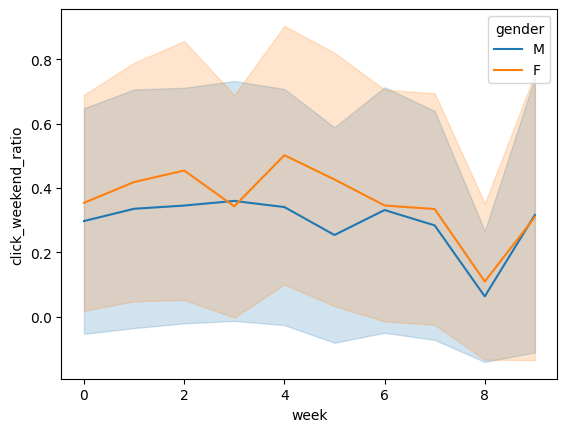

In [56]:
ts['click_weekend_ratio'] = ts['clicks_weekend'] / (ts['clicks_weekend'] +ts['clicks_weekday'] )
ax = sns.lineplot(data=ts, x="week", y="click_weekend_ratio", errorbar='sd', hue = 'gender')
plt.show()